In [1]:
# import the libraries as shown below

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.models import Sequential
from keras.models import Model,load_model
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Car/train'
valid_path = '/content/drive/MyDrive/Car/test'

In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94781440/94765736 [==============================] - 0s 0us/step


In [ ]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Car/Train/*')

In [ ]:
folders

['/content/drive/MyDrive/Car/Train/lamborghini',
 '/content/drive/MyDrive/Car/Train/audi',
 '/content/drive/MyDrive/Car/Train/mercedes']

In [ ]:
len(folders)

3

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Car/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Car/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [ ]:
validation_steps= len(test_set)
y=len(test_set)

In [ ]:
x=len(training_set)

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
    training_set,
    validation_data = test_set,
    epochs=50,
    steps_per_epoch= len(training_set),
    validation_steps= len(test_set)
  )

Epoch 1/50
2/2 [==============================] - 63s 48s/step - loss: 7.4632 - accuracy: 0.2812 - val_loss: 2.7111 - val_accuracy: 0.5172
Epoch 2/50
2/2 [==============================] - 1s 746ms/step - loss: 6.2067 - accuracy: 0.3906 - val_loss: 9.0815 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 1s 723ms/step - loss: 8.1853 - accuracy: 0.3281 - val_loss: 16.1829 - val_accuracy: 0.1552
Epoch 4/50
2/2 [==============================] - 1s 749ms/step - loss: 9.8018 - accuracy: 0.3594 - val_loss: 6.4707 - val_accuracy: 0.1724
Epoch 5/50
2/2 [==============================] - 1s 756ms/step - loss: 4.2255 - accuracy: 0.3906 - val_loss: 3.7892 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 1s 744ms/step - loss: 4.9152 - accuracy: 0.3438 - val_loss: 5.0893 - val_accuracy: 0.5172
Epoch 7/50
2/2 [==============================] - 1s 714ms/step - loss: 6.8890 - accuracy: 0.3750 - val_loss: 3.2789 - val_accuracy: 0.5690
Epoch 8/50
2/2 [====

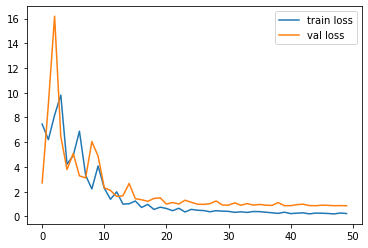

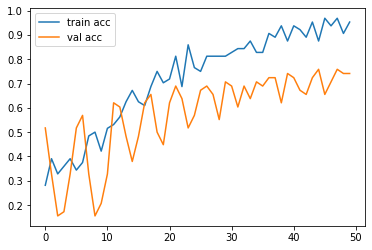

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file

model.save(f"../content/drive/MyDrive/models/model_resnet50.h5")

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[1.78957343e-01, 7.06535339e-01, 1.14507303e-01],
       [1.01723457e-02, 5.76525569e-01, 4.13302124e-01],
       [2.24166438e-02, 7.58277655e-01, 2.19305724e-01],
       [2.87504978e-02, 3.40601400e-04, 9.70908880e-01],
       [7.62827549e-05, 9.98936474e-01, 9.87143489e-04],
       [1.53233275e-01, 2.92311817e-01, 5.54454923e-01],
       [2.90962532e-02, 5.91863573e-01, 3.79040241e-01],
       [1.01137894e-05, 1.37710231e-04, 9.99852180e-01],
       [7.49312997e-01, 1.75411887e-02, 2.33145788e-01],
       [1.01811821e-02, 9.34054196e-01, 5.57646565e-02],
       [4.26856354e-02, 5.50717413e-01, 4.06596899e-01],
       [8.65211487e-02, 2.14429572e-02, 8.92035842e-01],
       [6.00293279e-02, 4.43540454e-01, 4.96430308e-01],
       [9.03816342e-01, 5.47250547e-02, 4.14585918e-02],
       [1.05760538e-03, 8.54053378e-01, 1.44889042e-01],
       [4.06664833e-02, 3.88312876e-01, 5.71020603e-01],
       [2.23407537e-01, 5.32732010e-01, 2.43860498e-01],
       [2.78952211e-01, 6.82124

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([1, 1, 1, 2, 1, 2, 1, 2, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2, 1, 0, 2,
       1, 0, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 1, 0, 2, 1,
       2, 0, 2, 1, 0, 2, 1, 2, 1, 1, 2, 1, 2, 1])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_resnet50.h5')

In [ ]:
img_data

In [ ]:
img=image.load_img('/content/drive/MyDrive/Car/Test/lamborghini/11.jpg',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [ ]:
x.shape

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

In [ ]:
model.predict(img_data)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==1